## 1. Introduction

Lorenzo

## 2. Model and Data

Richard

## 3. Hyperparameter optimisation

Jordi

## 4. Implementation and results

### 4.1 Setup 

In [12]:
import numpy as np
from pyGPGO.covfunc import squaredExponential
from pyGPGO.acquisition import Acquisition
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO
import pandas as pd
from image_classifier import *
%matplotlib inline
%precision 3
np.random.seed(23)

### 4.2 Main function

In [31]:
def hyp_optim_gp(acq_fn, fn, param_sets, n_evals):
    sexp = squaredExponential()
    gp = GaussianProcess(sexp)
    acq = Acquisition(mode=acq_fn)
    gpgo = GPGO(gp, acq, fn, param_sets)
    gpgo.run(max_iter=n_evals)
    return gpgo.getResult(), gpgo.history

In [5]:
param_sets = {
'max_zoom': ('cont', [1, 4]), 
'lr': ('cont', [1e-10, 4]),
'epochs': ('int', [1, 2]),
'cycle_len': ('int', [1, 2]),
'cycle_mult': ('int', [1, 2])
}

In [40]:
#%%capture
acq_fns = ['ExpectedImprovement', 'ProbabilityImprovement', 'UCB', 'Entropy']
#acq_fns = ['ExpectedImprovement']
df_acc = pd.DataFrame(columns=acq_fns, dtype=float)
opt_params = {}
n_evals = 2
for acq_fn in acq_fns: 
    res, hist = hyp_optim_gp(acq_fn, fit_eval_imageclassifier, param_sets, n_evals)
    df_acc[acq_fn] = hist
    opt_params[acq_fn] = dict(res[0])

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.


epoch      trn_loss   val_loss   accuracy                       
    0      16161718.648886 3089729.90925 0.991     


epoch      trn_loss   val_loss   accuracy                       
    0      2464.482859 455.219906 0.99      


epoch      trn_loss   val_loss   accuracy                       
    0      235991430604289.28 61084591338815.484 0.9895    
init   	 [3.30629 1.92482 1.      1.      1.     ]. 	   0.991 	  0.991
init   	 [3.7557  1.30338 1.      1.      1.     ]. 	    0.99 	  0.991
init   	 [2.17748 2.53573 1.      1.      1.     ]. 	  0.9895 	  0.991


epoch      trn_loss   val_loss   accuracy                       
    0      2363.598965 580.083981 0.9895    
1      	 [2.56853 1.41934 1.      1.      1.     ]. 	  0.9895 	 0.991 


epoch      trn_loss   val_loss   accuracy                       
    0      817381191.945195 175970455.424 0.989     
    1      6.025797390120457e+20 4.245878292419255e+21 0.5       
2      	 [2.58708 1.97556 1.00002 1.00002 1.72989]. 	  0.5    	 0.991 
Evaluation 	 Proposed point 	  Current eval. 	 Best eval.


epoch      trn_loss   val_loss   accuracy                       
    0      nan        nan        0.5       


epoch      trn_loss   val_loss   accuracy                     
    0      0.087044   0.050738   0.9875    


epoch      trn_loss   val_loss   accuracy                       
    0      1.9898101428534928e+24 2.2192201153294044e+20 0.5       
init   	 [3.77873 3.31438 1.      1.      1.     ]. 	     0.5 	 0.9875
init   	 [2.70748 0.14134 1.      1.      1.     ]. 	  0.9875 	 0.9875
init   	 [3.1039  2.88887 1.      1.      1.     ]. 	     0.5 	 0.9875


epoch      trn_loss   val_loss   accuracy                     
    0      0.096511   0.048498   0.988     
1      	 [2.70835 0.14607 1.      1.      1.     ]. 	  0.988 	 0.988 


epoch      trn_loss   val_loss   accuracy                    
    0      0.109147   0.048318   0.9925    
2      	 [2.71267 0.16973 1.      1.      1.     ]. 	  0.9925 	 0.9925
Evaluation 	 Proposed point 	  Current eval. 	 Best eval.


epoch      trn_loss   val_loss   accuracy                       
    0      5715068546129.591 2113392583639.04 0.985     


epoch      trn_loss   val_loss   accuracy                   
    0      176.489596 74.689969  0.9895    


epoch      trn_loss   val_loss   accuracy                       
    0      2842862106349.7246 791826797690.88 0.986     
init   	 [3.4211  2.77449 1.      1.      1.     ]. 	   0.985 	 0.9895
init   	 [2.04895 1.21437 1.      1.      1.     ]. 	  0.9895 	 0.9895
init   	 [2.92736 2.57118 1.      1.      1.     ]. 	   0.986 	 0.9895


epoch      trn_loss   val_loss   accuracy                       
    0      37946.453637 10776.151959 0.988     
1      	 [3.33955 1.48366 1.      1.      1.     ]. 	  0.988  	 0.9895


epoch      trn_loss   val_loss   accuracy                       
    0      446718880.837663 217537468.672 0.989     
    1      86157366.892712 28083324.452 0.988                   
    2      728580673984600.1 1.2614008125863756e+16 0.9595      
2      	 [2.74479 1.70087 1.50186 1.55787 1.58365]. 	  0.959  	 0.9895


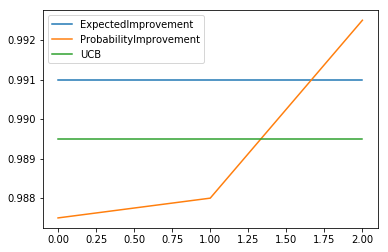

In [44]:
df_acc.plot(); 

some interpreation of results